In [38]:
from __future__ import print_function
from collections import Counter
import numpy as np
import pandas as pd
from scipy import optimize
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import calendar
import datetime

In [6]:
#load the pickle object for quick access
result = pd.read_pickle("/Users/Matt/Documents/Stevens/BIA660 Web Analytics/yelp_dataset_challenge_academic_dataset/Data/500_Dataset")

In [68]:
result.head()

,business_id,date,review_id,stars_x,text,type_x,user_id,votes,attributes,categories,...,hours,latitude,longitude,name,neighborhoods,open,review_count,stars_y,state,type_y
0,mpDxBBGywUE6GRRKja3sBA,2005-09-06,HtqQG2umwuVGbMbHapBm-A,4,"Upscale soul food. Cornbread, fried chicken, ...",review,Puv7uq6Wx4AtL_jVpC4d3w,"{u'funny': 0, u'useful': 0, u'cool': 0}","{u'Wheelchair Accessible': True, u'Take-out': ...","[Soul Food, Southern, Restaurants]",...,"{u'Monday': {u'close': u'21:30', u'open': u'11...",35.227318,-80.84013,Mert's Heart & Soul,[First Ward],True,652,3.5,NC,business
1,mpDxBBGywUE6GRRKja3sBA,2006-03-02,WIe91sMuGkxvPTEBXyIyrQ,4,Cornbread and Sweet Tea. If that was all you a...,review,3Gazlt5RwZQIu1ZWMwi0cg,"{u'funny': 0, u'useful': 0, u'cool': 0}","{u'Wheelchair Accessible': True, u'Take-out': ...","[Soul Food, Southern, Restaurants]",...,"{u'Monday': {u'close': u'21:30', u'open': u'11...",35.227318,-80.84013,Mert's Heart & Soul,[First Ward],True,652,3.5,NC,business
2,mpDxBBGywUE6GRRKja3sBA,2006-11-07,BPZqNCPQz-EC2AOi9WLrEQ,3,This place is ok. It can be crowded (meaning ...,review,K5dxGhJ99TmS6La6krwkcg,"{u'funny': 0, u'useful': 0, u'cool': 0}","{u'Wheelchair Accessible': True, u'Take-out': ...","[Soul Food, Southern, Restaurants]",...,"{u'Monday': {u'close': u'21:30', u'open': u'11...",35.227318,-80.84013,Mert's Heart & Soul,[First Ward],True,652,3.5,NC,business
3,mpDxBBGywUE6GRRKja3sBA,2007-05-24,QNa7UGC5R_yLY7oJpWQs-Q,4,I think that this place is worth going to just...,review,AJtc4UMsCDw8QJQMyfHa_w,"{u'funny': 0, u'useful': 0, u'cool': 0}","{u'Wheelchair Accessible': True, u'Take-out': ...","[Soul Food, Southern, Restaurants]",...,"{u'Monday': {u'close': u'21:30', u'open': u'11...",35.227318,-80.84013,Mert's Heart & Soul,[First Ward],True,652,3.5,NC,business
4,mpDxBBGywUE6GRRKja3sBA,2007-09-25,S9g5NqdkuU28C6XW0aBd0g,4,"Ah Mert's! I love this place! It's not fancy, ...",review,bxGekdRVUysLtZ4BYF8wEQ,"{u'funny': 0, u'useful': 1, u'cool': 1}","{u'Wheelchair Accessible': True, u'Take-out': ...","[Soul Food, Southern, Restaurants]",...,"{u'Monday': {u'close': u'21:30', u'open': u'11...",35.227318,-80.84013,Mert's Heart & Soul,[First Ward],True,652,3.5,NC,business


In [66]:
def exploreBusiness(businessID):
    #exploratory Analysis for business ID mpDxBBGywUE6GRRKja3sBA
    business1 = result[result["business_id"]==businessID]
    #change date into datetime
    business1['date'] = pd.to_datetime(business1['date'])
    business1['Year-Month'] = business1.date.map(lambda x: x.strftime('%Y-%m'))
    business1['Qdate'] = [date - pd.tseries.offsets.DateOffset(days=1) + pd.tseries.offsets.QuarterEnd() for date in business1.date]
    #review_counts = business1.groupby('Year-Month')['review_id'].count()
    review_counts = business1.groupby('Qdate')['review_id'].count()
    ax = review_counts.plot(kind='bar', figsize=(20,10))
    return ax
    

/Users/Matt/anaconda2/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Matt/anaconda2/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


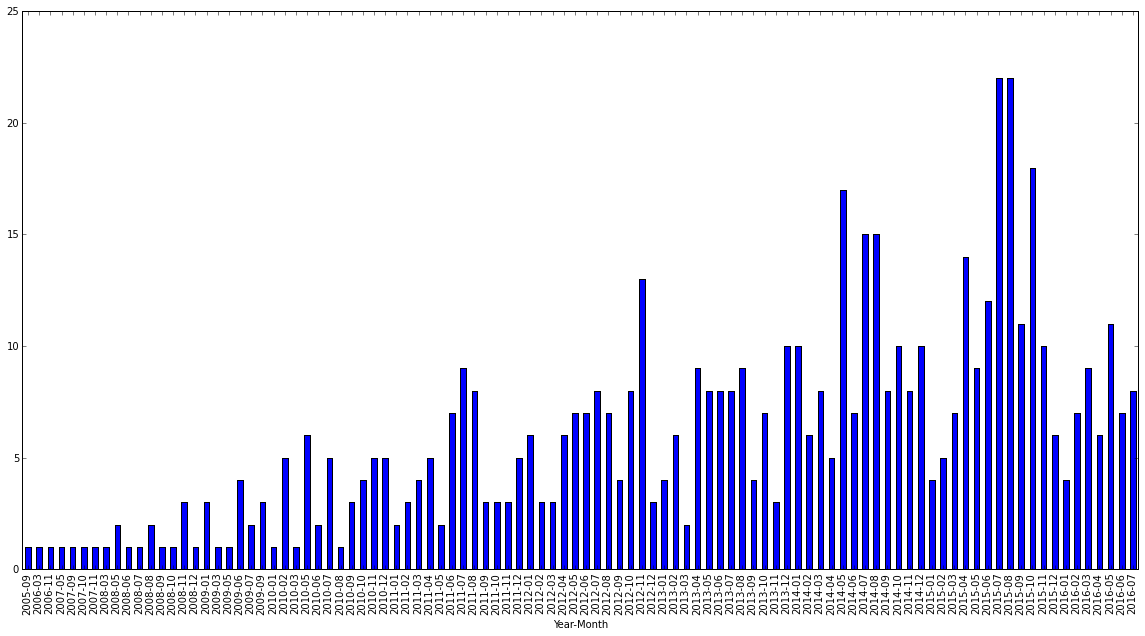

In [55]:
exploreBusiness("mpDxBBGywUE6GRRKja3sBA")

/Users/Matt/anaconda2/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Matt/anaconda2/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


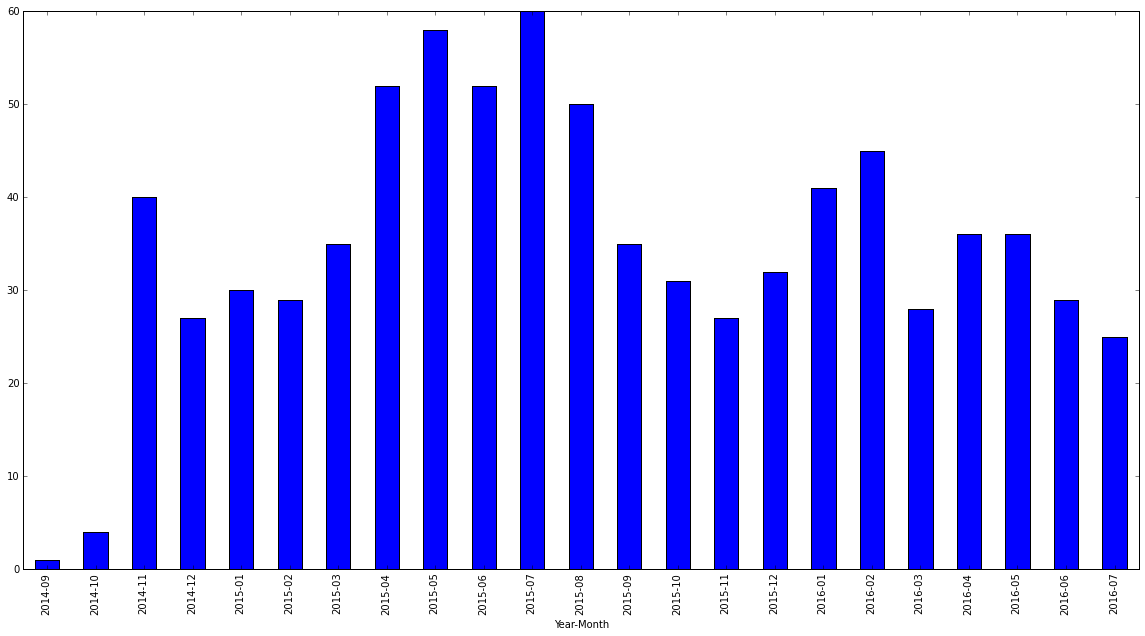

In [57]:
exploreBusiness("HdpRAsa0mPkPJg1x536uSA")

/Users/Matt/anaconda2/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Matt/anaconda2/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


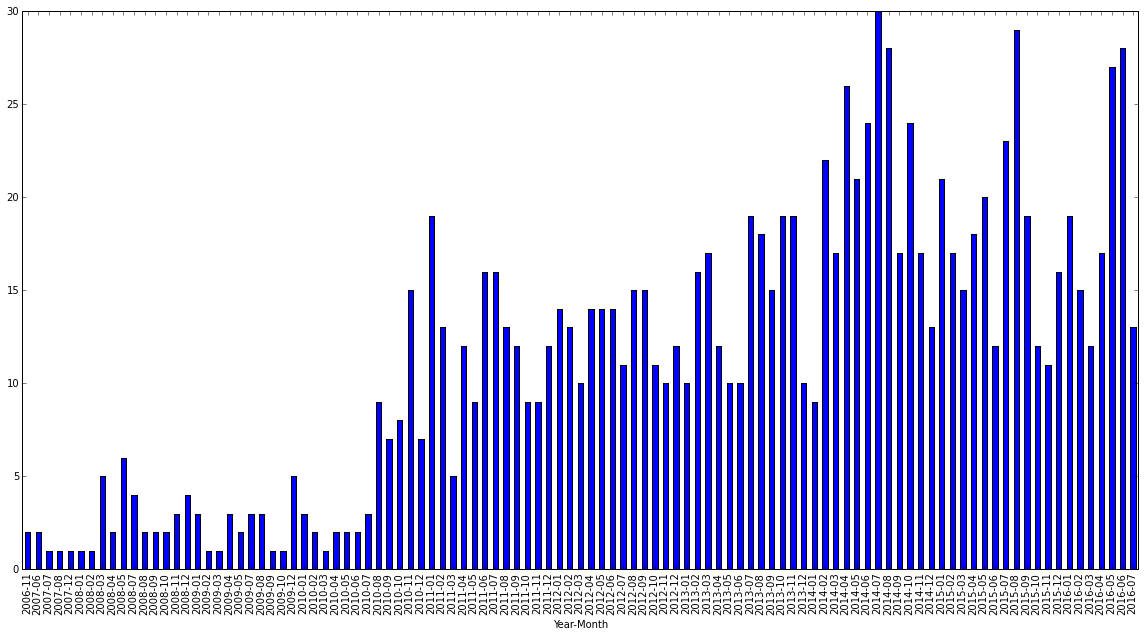

In [62]:
exploreBusiness("3Q0QQPnHcJuX1DLCL9G9Cg")
#what happened in 08-2010??

/Users/Matt/anaconda2/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Matt/anaconda2/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Matt/anaconda2/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydat

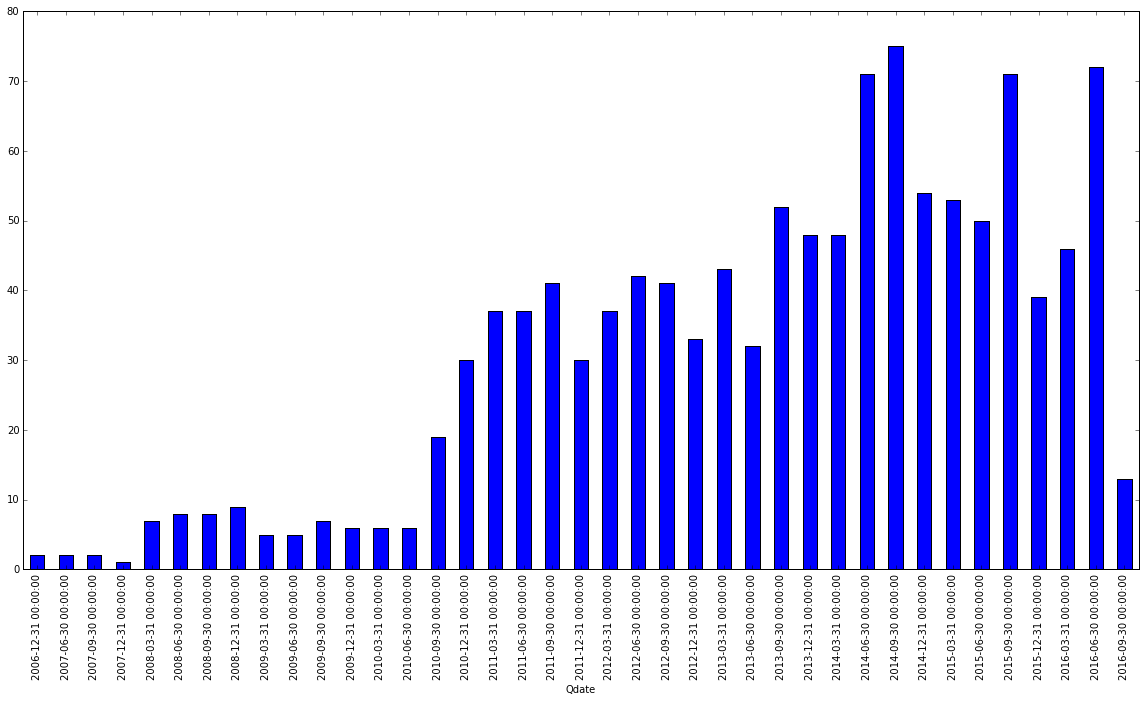

In [67]:
#this is done by Quarterly periods
exploreBusiness("3Q0QQPnHcJuX1DLCL9G9Cg")